In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%config InlineBackend.figure_format = 'retina'


In [2]:
data = pd.read_csv('../../Dataset/adult.data.csv')
data.columns = data.columns.str.replace('-', '_')
data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


### 1. How many men and women (sex feature) are represented in this dataset?

In [3]:
data.sex.value_counts()

sex
Male      21790
Female    10771
Name: count, dtype: int64

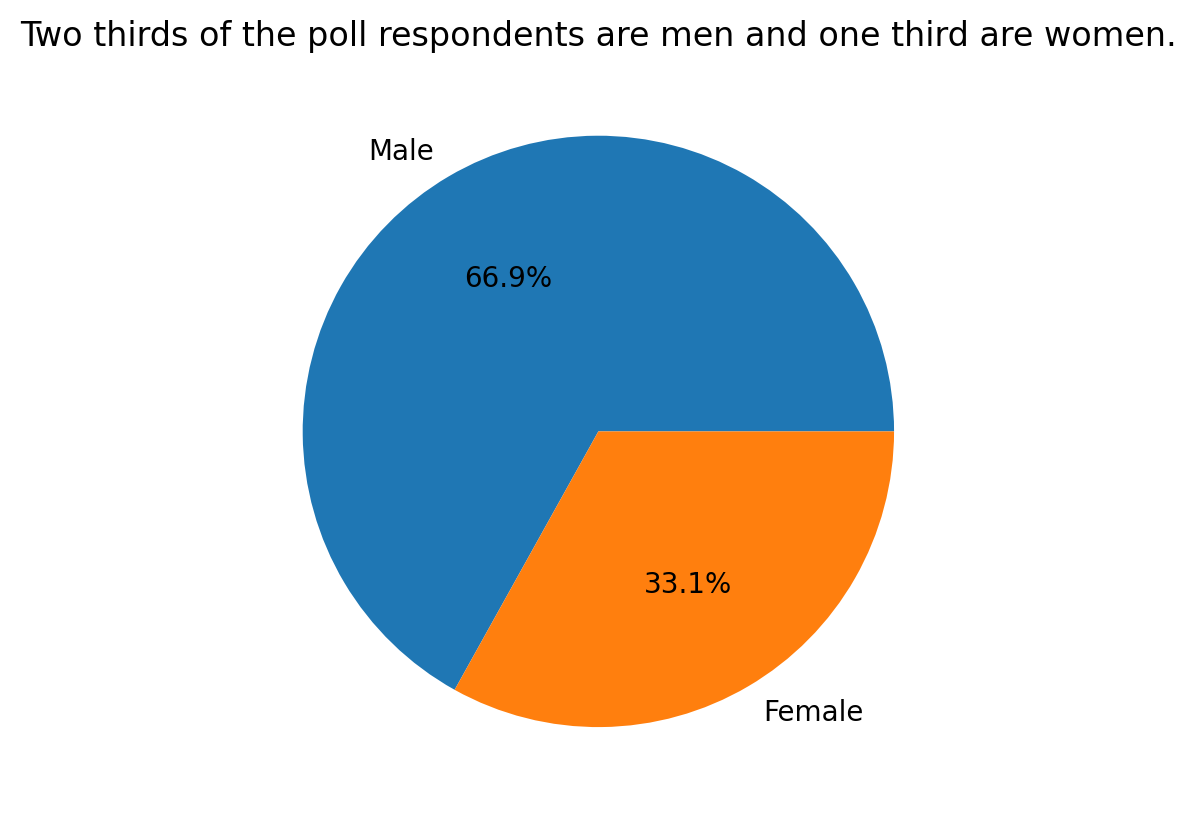

In [4]:

plt.pie(data.sex.value_counts(), labels=data.sex.value_counts().index, autopct='%1.1f%%')
plt.title('Two thirds of the poll respondents are men and one third are women.')
plt.show()

### 2. What is the average age (age feature) of women?

In [5]:
# data.loc[data['sex'] == 'Female', 'age'].mean()
data[data.sex == 'Female']['age'].mean()

36.85823043357163

### 3. What is the percentage of German citizens (native-country feature)?

In [6]:
# data.native_country.value_counts(normalize=True)*100
print(f'{len(data[data.native_country == 'Germany'])/len(data)*100}%')

0.42074874850281013%


<Axes: xlabel='native_country'>

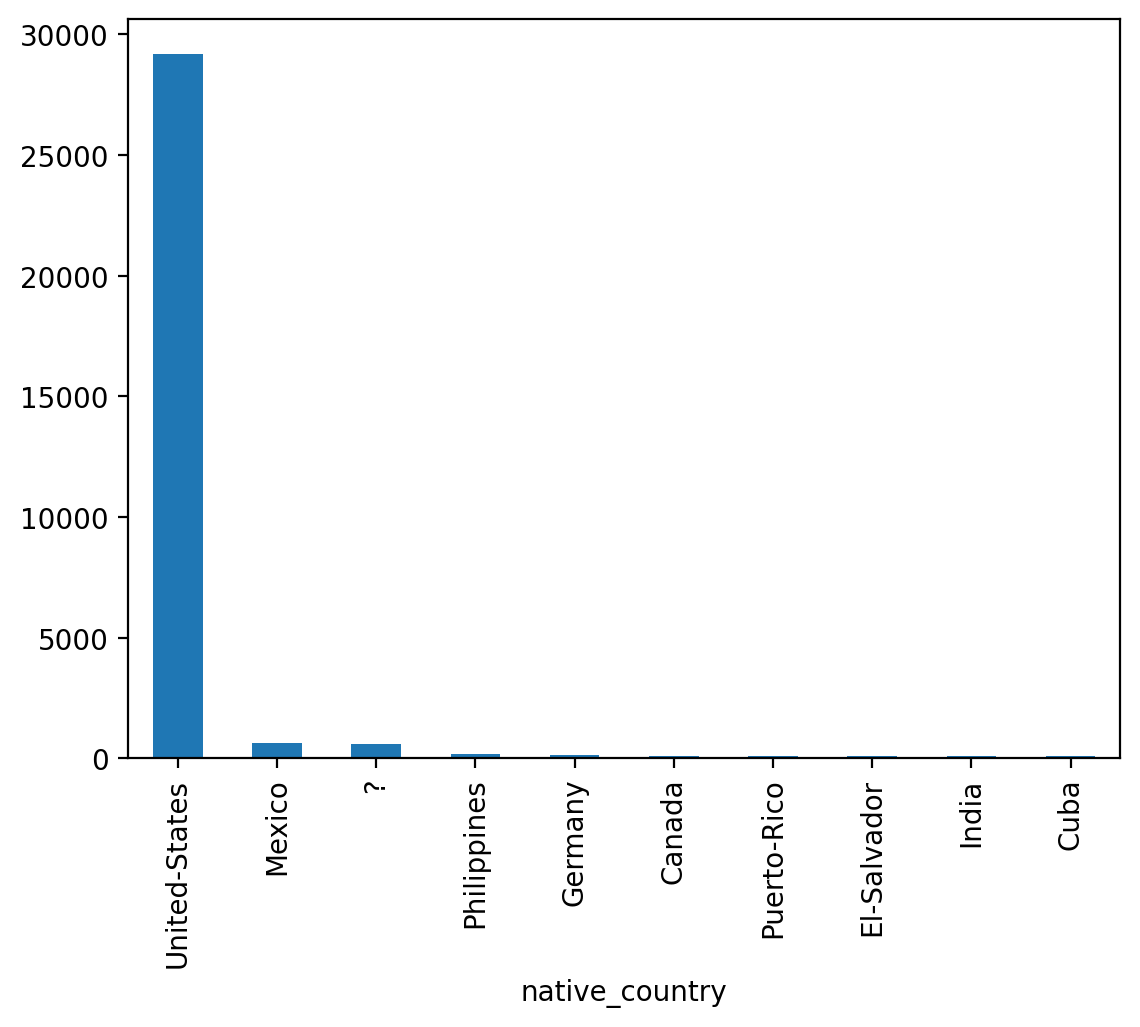

In [7]:
data.native_country.value_counts().head(10).plot(kind='bar')

### 4. What are the mean and standard deviation of age for those who earn more than 50K per year (salary feature)?

In [8]:
data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [9]:
data[data.salary == '>50K']['age'].describe()

count    7841.000000
mean       44.249841
std        10.519028
min        19.000000
25%        36.000000
50%        44.000000
75%        51.000000
max        90.000000
Name: age, dtype: float64

In [10]:
age_rich = data[data.salary == '>50K']['age']
print(f'The average age of the rich: {round(age_rich.mean())} +- {round(age_rich.std(), 1)} years.')

The average age of the rich: 44 +- 10.5 years.


### 5. How about those who earn less than 50K per year?

In [11]:
age_poor = data[data.salary == '<=50K']['age']
print(f'The average age of the poor: {round(age_poor.mean())} +- {round(age_poor.std(), 1)} years.')


The average age of the poor: 37 +- 14.0 years.


### 6. Is it true that people who earn more than 50K have at least high school education? (education – Bachelors, Prof-school, Assoc-acdm, Assoc-voc, Masters or Doctorate feature)

In [12]:
# Check if education num correspondant to education
data.groupby('education_num')['education'].value_counts().sort_index(ascending=True)

education_num  education   
1              Preschool          51
2              1st-4th           168
3              5th-6th           333
4              7th-8th           646
5              9th               514
6              10th              933
7              11th             1175
8              12th              433
9              HS-grad         10501
10             Some-college     7291
11             Assoc-voc        1382
12             Assoc-acdm       1067
13             Bachelors        5355
14             Masters          1723
15             Prof-school       576
16             Doctorate         413
Name: count, dtype: int64

In [13]:
pd.crosstab(data.salary, data.education, margins=True)

education,10th,11th,12th,1st-4th,5th-6th,7th-8th,9th,Assoc-acdm,Assoc-voc,Bachelors,Doctorate,HS-grad,Masters,Preschool,Prof-school,Some-college,All
salary,,,,,,,,,,,,,,,,,
<=50K,871,1115,400,162,317,606,487,802,1021,3134,107,8826,764,51,153,5904,24720
>50K,62,60,33,6,16,40,27,265,361,2221,306,1675,959,0,423,1387,7841
All,933,1175,433,168,333,646,514,1067,1382,5355,413,10501,1723,51,576,7291,32561


Text(0, 0.5, 'Count')

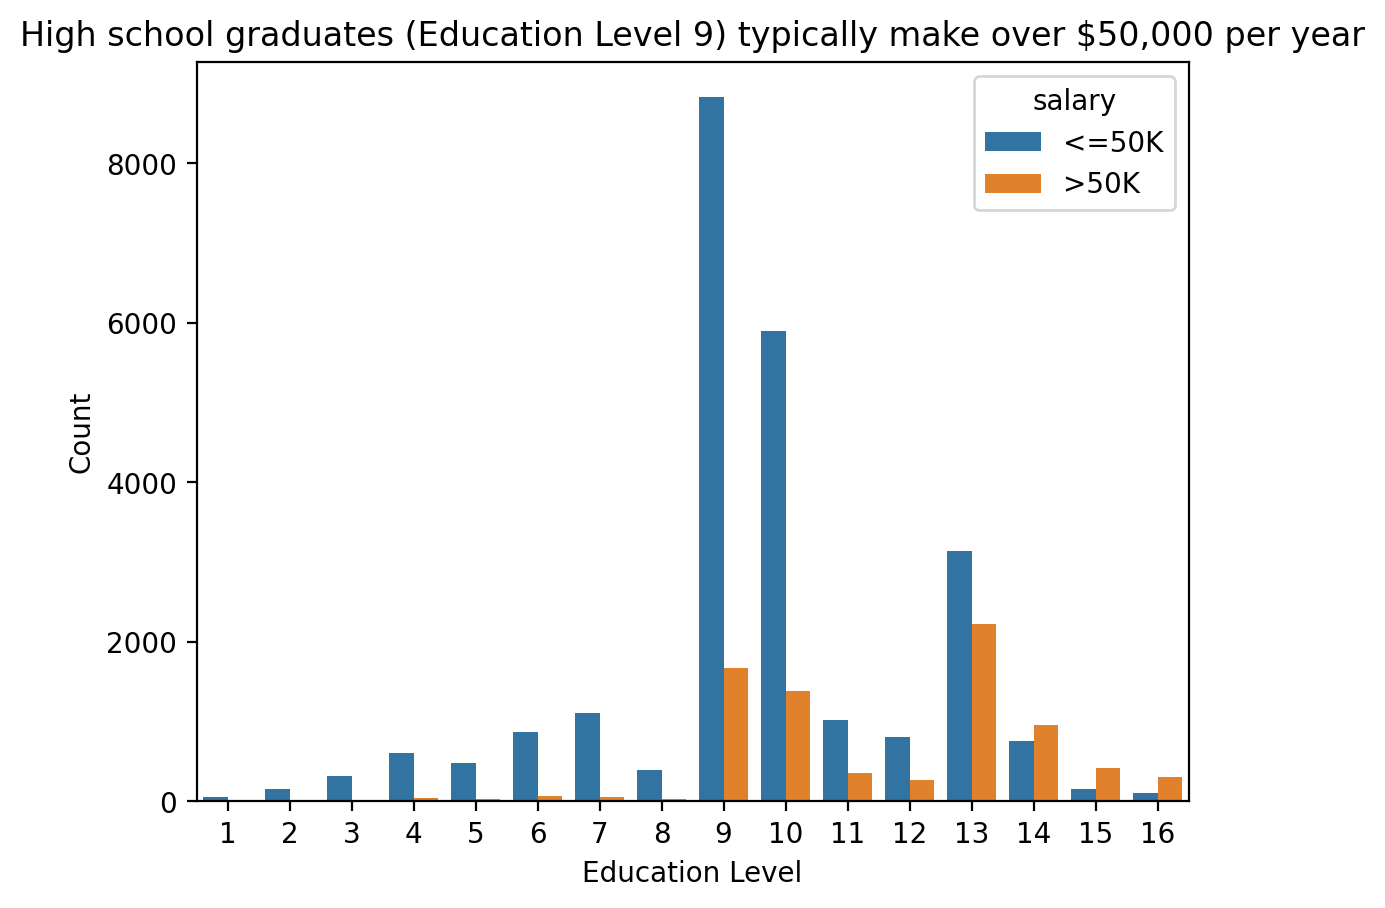

In [14]:
ax = sns.countplot(data=data, hue='salary', x='education_num')
ax.set_title('High school graduates (Education Level 9) typically make over $50,000 per year')
ax.set_xlabel('Education Level')
ax.set_ylabel('Count')

In [15]:
data.loc[data['salary'] == '>50K', 'education'].unique()

array(['HS-grad', 'Masters', 'Bachelors', 'Some-college', 'Assoc-voc',
       'Doctorate', 'Prof-school', 'Assoc-acdm', '7th-8th', '12th',
       '10th', '11th', '9th', '5th-6th', '1st-4th'], dtype=object)

### 7. Display age statistics for each race (race feature) and each gender (sex feature). Use groupby() and describe(). Find the maximum age of men of Amer-Indian-Eskimo race.

In [16]:
data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [17]:
data.groupby(['race', 'sex'])['age'].describe()

count       mean        std   min   25%   50%  \
race               sex                                                       
Amer-Indian-Eskimo Female    119.0  37.117647  13.114991  17.0  27.0  36.0   
                   Male      192.0  37.208333  12.049563  17.0  28.0  35.0   
Asian-Pac-Islander Female    346.0  35.089595  12.300845  17.0  25.0  33.0   
                   Male      693.0  39.073593  12.883944  18.0  29.0  37.0   
Black              Female   1555.0  37.854019  12.637197  17.0  28.0  37.0   
                   Male     1569.0  37.682600  12.882612  17.0  27.0  36.0   
Other              Female    109.0  31.678899  11.631599  17.0  23.0  29.0   
                   Male      162.0  34.654321  11.355531  17.0  26.0  32.0   
White              Female   8642.0  36.811618  14.329093  17.0  25.0  35.0   
                   Male    19174.0  39.652498  13.436029  17.0  29.0  38.0   

                             75%   max  
race               sex                  
Amer-Indian-Eskimo Female  46.00  80.0  
                   Male    45.00  82.0  
Asian-Pac-Islander Female  43.75  75.0  
                   Male    46.00  90.0  
Black              Female  46.00  90.0  
                   Male    46.00  90.0  
Other              Female  39.00  74.0  
                   Male    42.00  77.0  
White              Female  46.00  90.0  
                   Male    49.00  90.0

[Text(0, 0, '81'),
 Text(0, 0, '82.5'),
 Text(0, 0, '90'),
 Text(0, 0, '75.5'),
 Text(0, 0, '90')]

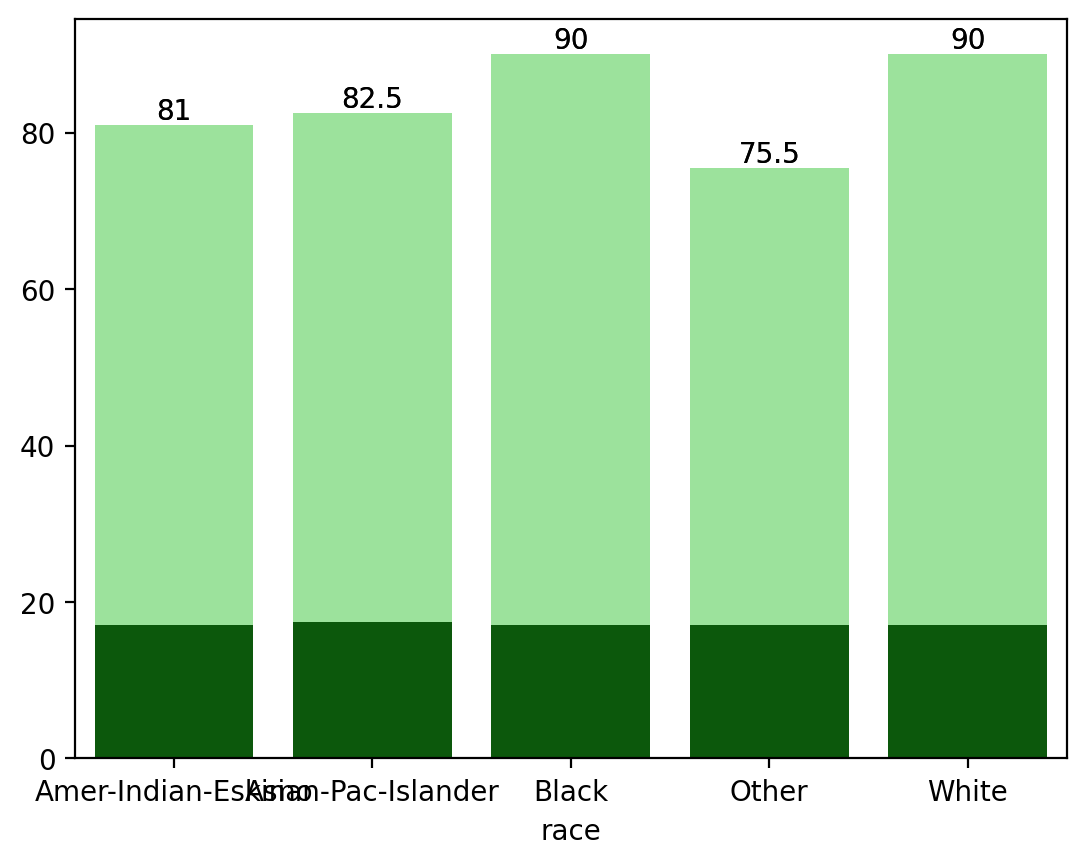

In [18]:
# data.groupby(['sex', 'race'])['age'].agg(['min', 'max'])
max_age = pd.crosstab(index=data.sex, columns=data.race, values=data.age, aggfunc='max')
min_age = pd.crosstab(index=data.sex, columns=data.race, values=data.age, aggfunc='min')
ax = sns.barplot(max_age, color='lightgreen',errorbar=None)
ax.bar_label(ax.containers[0])
ax= sns.barplot(min_age, color='darkgreen', errorbar=None)
ax.bar_label(ax.containers[0])



### 8. Among whom is the proportion of those who earn a lot (>50K) greater: married or single men (marital-status feature)? Consider as married those who have a marital-status starting with Married (Married-civ-spouse, Married-spouse-absent or Married-AF-spouse), the rest are considered bachelors.

In [19]:
data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [20]:
data.marital_status.value_counts()

marital_status
Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: count, dtype: int64

[Text(0, 0, '55.9486'), Text(0, 0, '44.0514')]

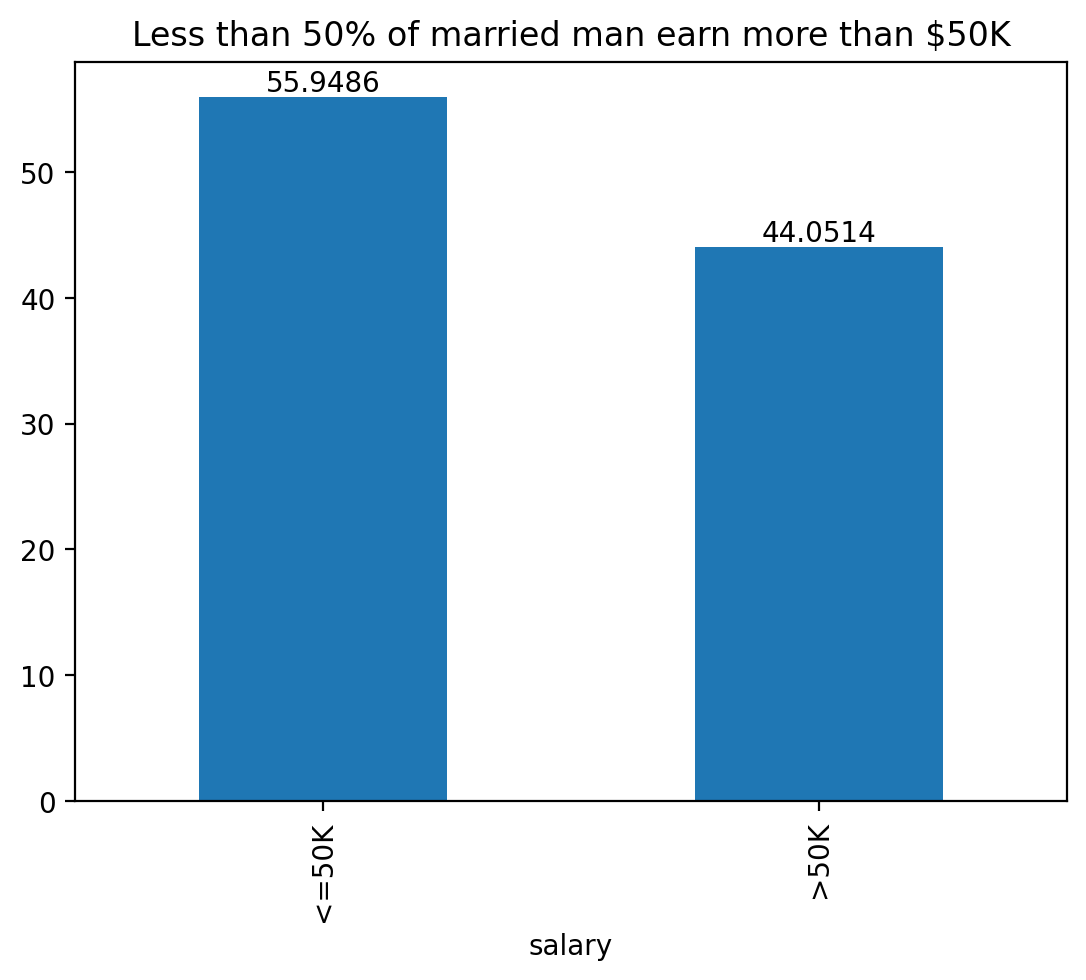

In [21]:
ax = (data[(data.sex == 'Male') & 
           (data.marital_status.str.startswith('Married'))] \
            ['salary'].value_counts(normalize=True)*100) \
                .plot(kind='bar')
ax.set_title('Less than 50% of married man earn more than $50K')
ax.bar_label(ax.containers[0])

[Text(0, 0, '91.5505'), Text(0, 0, '8.44951')]

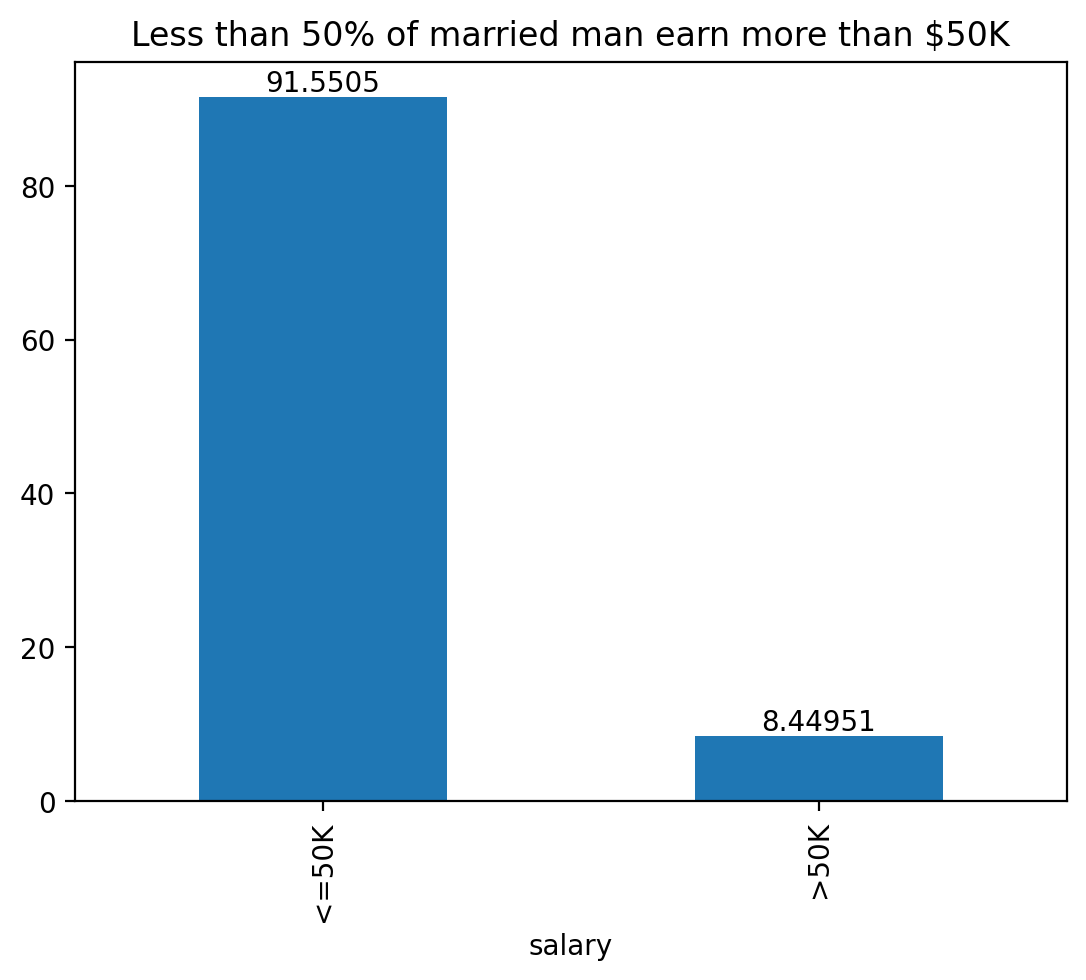

In [22]:
ax = (data[(data.sex == 'Male') & 
           (data.marital_status.isin(['Never-married', 'Separated', 'Divorced', 'Widowed']))] \
            ['salary'].value_counts(normalize=True)*100) \
                .plot(kind='bar')
ax.set_title('Less than 50% of married man earn more than $50K')
ax.bar_label(ax.containers[0])

In [37]:
male_data = data[data.sex == 'Male']
male_data['single'] = np.where(male_data.marital_status.str.startswith('Married'),
                               False, True)

/var/folders/j1/b9w4xb5j3fvg6jd7gdwhyjym0000gp/T/ipykernel_5855/1744729678.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  male_data['single'] = np.where(male_data.marital_status.str.startswith('Married'),


<Axes: xlabel='salary', ylabel='count'>

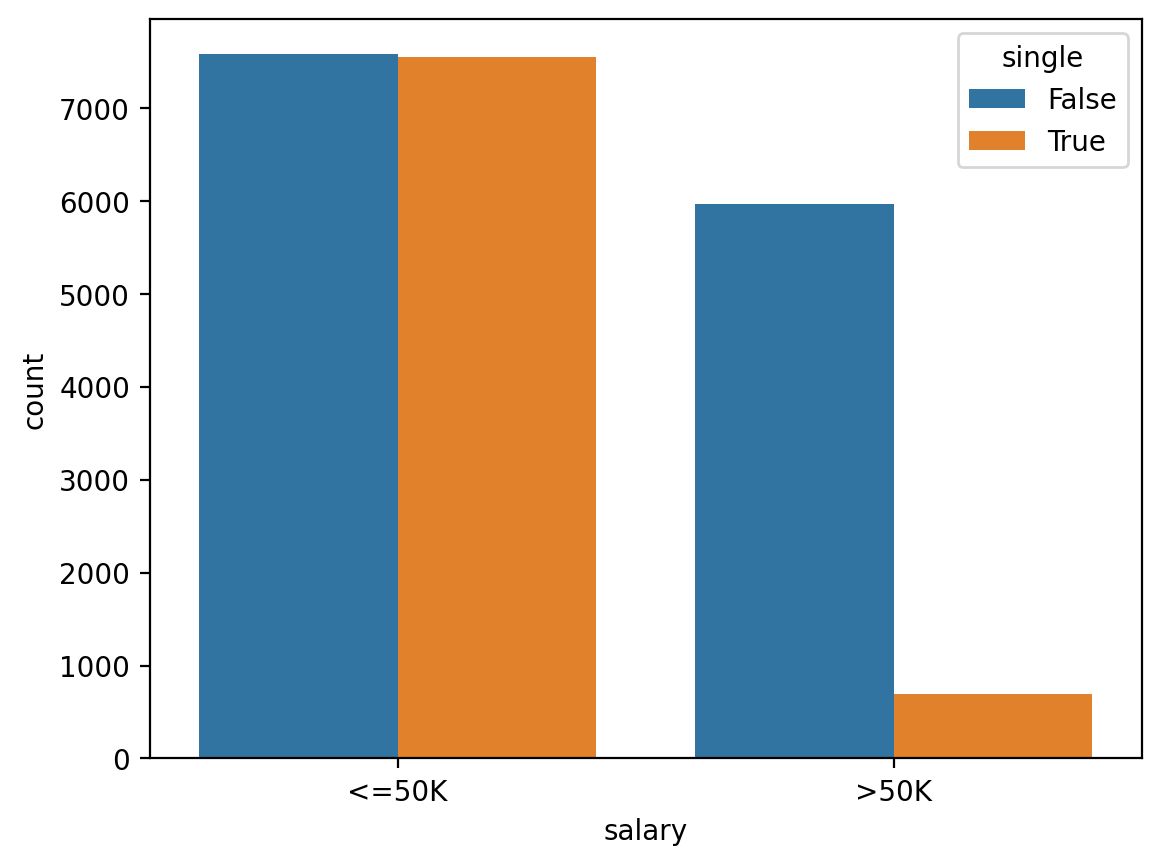

In [46]:
ax = pd.crosstab(index=male_data.salary, columns=male_data.single, normalize=True)*100
# ax.plot(kind='bar')
sns.countplot(data=male_data, x='salary', hue='single')

### 9. What is the maximum number of hours a person works per week (hours-per-week feature)? How many people work such a number of hours, and what is the percentage of those who earn a lot (>50K) among them?

In [94]:
# max_work_hour = data.hours_per_week.max()
max_load = data.hours_per_week.values.max()
print(f'Longest working hours per week: {max_load} hours')
num_workaholics = data[data.hours_per_week == max_load].shape[0]
print(f'Total number of those workaholic workers: {num_workaholics} people')
rich_workaholic = round(data[(data.salary == '>50K') & 
                       (data.hours_per_week == max_load)].shape[0]/num_workaholics*100, 1)
print(f'Percentage of rich among them: {rich_workaholic}%')

Longest working hours per week: 99 hours
Total number of those workaholic workers: 85 people
Percentage of rich among them: 29.4%


### 10. Count the average time of work (hours-per-week) those who earning a little and a lot (salary) for each country (native-country).

In [158]:
# avg_hour_per_country = data.groupby(['native_country', 'salary'])['hours_per_week'].mean()
# print(avg_hour_per_country)

for (country, salary) , sub_df in data.groupby(['native_country', 'salary']):
    print(f'{country} {salary} {round(sub_df['hours_per_week'].mean(), 2)}')

? <=50K 40.16
? >50K 45.55
Cambodia <=50K 41.42
Cambodia >50K 40.0
Canada <=50K 37.91
Canada >50K 45.64
China <=50K 37.38
China >50K 38.9
Columbia <=50K 38.68
Columbia >50K 50.0
Cuba <=50K 37.99
Cuba >50K 42.44
Dominican-Republic <=50K 42.34
Dominican-Republic >50K 47.0
Ecuador <=50K 38.04
Ecuador >50K 48.75
El-Salvador <=50K 36.03
El-Salvador >50K 45.0
England <=50K 40.48
England >50K 44.53
France <=50K 41.06
France >50K 50.75
Germany <=50K 39.14
Germany >50K 44.98
Greece <=50K 41.81
Greece >50K 50.62
Guatemala <=50K 39.36
Guatemala >50K 36.67
Haiti <=50K 36.33
Haiti >50K 42.75
Holand-Netherlands <=50K 40.0
Honduras <=50K 34.33
Honduras >50K 60.0
Hong <=50K 39.14
Hong >50K 45.0
Hungary <=50K 31.3
Hungary >50K 50.0
India <=50K 38.23
India >50K 46.48
Iran <=50K 41.44
Iran >50K 47.5
Ireland <=50K 40.95
Ireland >50K 48.0
Italy <=50K 39.62
Italy >50K 45.4
Jamaica <=50K 38.24
Jamaica >50K 41.1
Japan <=50K 41.0
Japan >50K 47.96
Laos <=50K 40.38
Laos >50K 40.0
Mexico <=50K 40.0
Mexico >50K 46

In [159]:
pd.crosstab(index=data.salary, columns=data.native_country)

native_country,?,Cambodia,Canada,China,Columbia,Cuba,Dominican-Republic,Ecuador,El-Salvador,England,...,Portugal,Puerto-Rico,Scotland,South,Taiwan,Thailand,Trinadad&Tobago,United-States,Vietnam,Yugoslavia
salary,,,,,,,,,,,,,,,,,,,,,
<=50K,437,12,82,55,57,70,68,24,97,60,...,33,102,9,64,31,15,17,21999,62,10
>50K,146,7,39,20,2,25,2,4,9,30,...,4,12,3,16,20,3,2,7171,5,6
